In [8]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joypy
%matplotlib inline

In [2]:
data = pd.read_excel('../../data_20190403.xlsx','Fig1')
data

,Kingdom,Sum - Biomass,Uncertainty
0,Animals,1.897914,4.0
1,Archaea,0.331734,3.0
2,Bacteria,1.326934,1.8
3,Fungi,0.259000,10.0
4,Plants,0.525702,3.0
5,Protists,1.802000,3.0
6,Viruses,0.046200,2.3


In [4]:
#sns.violinplot(x='Sum - Biomass',y='variable',data=g_tot, orient='h', hue= 'top', split=True, cut=0, scale_hue=False,linewidth=0,bw=0.25)
def generate_log_dist(est_data):
    dist = pd.DataFrame(np.random.lognormal(mean = np.log(est_data['Sum - Biomass']), sigma = np.log(est_data['Uncertainty'])/1.96,size=100000).reshape([-1,1]))
    return dist[(dist[0] >dist[0].quantile(0.025)) & (dist[0] <dist[0].quantile(0.975))]



[Text(0,0,'0.01'),
 Text(0,0,'0.03'),
 Text(0,0,'0.1'),
 Text(0,0,'0.3'),
 Text(0,0,'1'),
 Text(0,0,'3')]

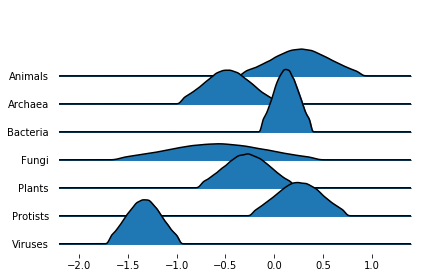

In [18]:
f = data.groupby('Kingdom').apply(generate_log_dist)
#sns.violinplot(data=f, hue='Kingdom')
f2 = f.reset_index()
f2 = f2[['Kingdom',0]]
#sns.violinplot(x='Kingdom',y=0,data=f2)
#sns.violinplot(x='Kingdom',y=0,data=f2, orient='h', split=True, cut=0, scale_hue=False,linewidth=0,bw=0.25)
#f2
f2[0] = np.log10(f2[0])
h = joypy.joyplot(f2,by='Kingdom')
ax = plt.gca()
ax.set_yticklabels([0.01,0.03,0.1,0.3,1,3,10])


In [38]:
f2.sort_values()

,Kingdom,0,top
0,Animals,-0.184187,True
1,Animals,-0.220209,True
2,Animals,0.422349,True
3,Animals,0.393603,True
4,Animals,0.432479,True
5,Animals,0.346393,True
6,Animals,0.882180,True
7,Animals,-0.070847,True
8,Animals,0.294781,True
9,Animals,0.393488,True


In [32]:
f2['top'] = True
f3['top'] = False
f4 = f2.append(f3)

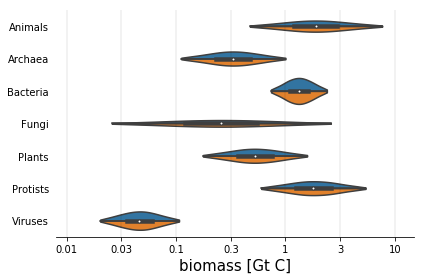

In [41]:
vio = sns.violinplot(x=0,y='Kingdom',data=f4, orient='h', hue= 'top', split=True, cut=0, scale_hue=False,linewidth=0,bw=0.25)
vio = sns.violinplot(x=0,y='Kingdom',data=f4, orient='h', hue= 'top', split=True, cut=0, scale_hue=False,bw=0.25)
#sns.boxplot(x=0,y='Kingdom',data=f4, orient='h',width=0.1)
vio.set_xticks([-2,-1.5,-1,-0.5,0,0.5,1,1.5])
vio.set_xlim([-2.1,np.log10(15)])
#vio.set_ylim([5.5,-1])
vio.set_xticklabels([0.01,0.03,0.1,0.3,1,3,10,30])
#vio.grid(color='k',axis='y',linewidth=2)
vio.grid(color='k',axis='x',linewidth=0.1)
vio.set_ylabel('')
vio.set_xlabel('biomass [Gt C]', fontsize=15)
j = vio.legend()
j.set_visible(False)


plt.tight_layout()
sns.despine()

plt.gca().spines['left'].set_visible(False)
plt.gca().tick_params(left=False)
plt.savefig('20100404raw_fig1b.svg')

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 30 17:46:49 2018

@author: yinonbaron
"""

import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '/home/yinonbaron/git/milo_lab/biomass_distribution/statistics_helper')
from CI_helper import *

data = pd.read_excel('../../results.xlsx','Fig2C')

plt.rc('font', family = 'DejaVu Sans', size=12)
def CI_sum_prop_dist(estimates, mul_CIs):
    """
    This function calculates the 95% confidence interval of a sum of two estimates. 
    We assume these estimates are distributed lognormally with 95% confidence interval provided as input
    Input:
        estimates: numpy array of the estimates to sum over
        mul_CIs: numpy array containing the 95% confidence interval for each estimate in the argument estimates
    Output: 95% multiplivative condifence inverval of the sum of the estimates
    """
    sample_size = 100000
    data = np.zeros([0,sample_size])
    
    # Iterate over the estimates 
    for ind, estimate in enumerate(estimates):
        # For each estimate, sample 1000 samples from a lognormal distribution with a mean of log(estimate) and std of log(95_CI)/1.96
        # This generates an array with N rows and 1000 columns, where N is the number of estimates in the argument estimates
        sample = np.random.lognormal(mean = np.log(estimate), sigma = np.log(mul_CIs[ind])/1.96,size=sample_size).reshape([1,-1])
        data = np.vstack((data,sample))

    # Sum over the N estimates to generate a distribution of sums
    data_sum = data.sum(axis=0)    

    
    return pd.DataFrame(data_sum)

def generate_log_dist(est_data):
    dist = pd.DataFrame(np.random.lognormal(mean = np.log(est_data['biomass']), sigma = np.log(est_data['uncertainty'])/1.96,size=100000).reshape([-1,1]))
    return dist[(dist[0] >dist[0].quantile(0.025)) & (dist[0] <dist[0].quantile(0.975))]

auto_data = data.iloc[20:27,0:3].set_index('Terrestrial')
hetero_dat = data.iloc[20:36,3:6].set_index('Unnamed: 3')

auto_data.columns = ['biomass','uncertainty']
hetero_dat.columns = ['biomass','uncertainty']

plants = auto_data.loc[['Seagrass','Macroalgaea','Green algae picophytoplankton']]
plant_dist = CI_sum_prop_dist(plants['biomass'],plants['uncertainty'])
plants_tot = plants.sum()
plants_tot['uncertainty'] = CI_sum_prop(plants['biomass'],plants['uncertainty'])
plants_tot_dist = generate_log_dist(plants_tot)

bact = hetero_dat.loc['Marine bacteria']
bact_dist = generate_log_dist(bact)

fungi = hetero_dat.loc[['Epipelagic fungi','Deep sea fungi','Particle attached fungi']]
fungi_dist = CI_sum_prop_dist(fungi['biomass'],fungi['uncertainty'])
fungi_tot = fungi.sum()
fungi_tot['uncertainty'] = CI_sum_prop(fungi['biomass'],fungi['uncertainty'])
fungi_tot_dist = generate_log_dist(fungi_tot)

animals = hetero_dat.loc[['Mesozooplankton','Macrozooplankton (including pteropods and gelatineous plankton)','Fish','Molluscs (squid)','Cnidaria (corals)','Wild marine mammals','Nematodes']]
animals_dist = CI_sum_prop_dist(animals['biomass'], animals['uncertainty'])
animals_tot = animals.sum()
animals_tot['uncertainty'] = CI_sum_prop(animals['biomass'],animals['uncertainty'])
animals_tot_dist = generate_log_dist(animals_tot)

arch = hetero_dat.loc['Marine archaea']
arch_dist = generate_log_dist(arch)

protists = auto_data.loc[['Protist picophytoplankton','Diatoms','Phaeocystis']].append(hetero_dat.loc[['Microzooplankton','Rhizaria','Particle attached protists']])
protists_dist = CI_sum_prop_dist(protists['biomass'],protists['uncertainty'])
protists_tot = protists.sum()
protists_tot['uncertainty'] = CI_sum_prop(protists['biomass'],protists['uncertainty'])
protists_tot_dist = generate_log_dist(protists_tot)

viruses = hetero_dat.loc['Viruses']
viruses_dist = generate_log_dist(viruses)


violin_data = pd.concat([animals_dist,protists_dist,bact_dist,plant_dist,fungi_dist,arch_dist,viruses_dist],axis=1)
violin_data.columns = ['animals','protists','bacteria','plants','fungi','archaea','viruses']

violin_data_tot = pd.concat([animals_tot_dist,protists_tot_dist,bact_dist,plants_tot_dist,fungi_tot_dist,arch_dist,viruses_dist],axis=1)
violin_data_tot.columns = ['animals','protists','bacteria','plants','fungi','archaea','viruses']


#my_pal = {}
#groups = ['animals (incl. zooplankton)','protists (incl. protist algae)','bacteria','plants (incl. plant algae)','archaea','fungi']
#cols= sns.color_palette(['#ff6666','#5f8dd3','#ff9e69','#8bd58b','#d18cff','#ffe995'])
#for x,y in zip(groups,cols):
#    my_pal[x] = y


#sns.violinplot(data=np.log10(violin_data),palette=my_pal, orient='h', cut=0.1,split=True)

#ax = plt.gca()
#ax.set_yticklabels([0.03,0.03,0.1,0.3,1,3,10])
#ax.set_ylabel('Biomass [Gt C]',fontsize=16)
#ax.set_ylim(np.log10([0.03,30]))
#ax.set_size_inches([20,10])

g = violin_data.melt()
g['top'] = False
g['value'] = np.log10(g['value'])
g2 = g.copy()
g2['top'] = True
#g2['value'] = 0
#g2['variable'] = 0
#
g = g.append(g2)
#
#vio = sns.violinplot(x='value',y='variable',data=g, orient='h', hue= 'top', split=True, cut=0, scale_hue=False,linewidth=0)
#vio = sns.violinplot(x='value',y='variable',data=g, orient='h', hue= 'top', split=True, cut=0, scale_hue=False)
#vio.set_xticks([-1.5,-1,-0.5,0,0.5,1,1.5])
#vio.set_xlim([-1.5,np.log10(15)])
##vio.set_ylim([5.5,-1])
#vio.set_xticklabels([0.03,0.1,0.3,1,3,10,30])
##vio.grid(color='k',axis='y',linewidth=2)
#vio.grid(color='k',axis='x',linewidth=0.1)
#vio.set_ylabel('')
#vio.set_xlabel('biomass [Gt C]', fontsize=15)
#j = vio.legend()
#j.set_visible(False)
#
#plt.tight_layout()
#sns.despine()
#vio.spines['left'].set_visible(False)
#vio.tick_params(left=False)
#
##ax.set_yscale('log')
#
g_tot = violin_data_tot.melt()
g_tot['top'] = False
g_tot['value'] = np.log10(g_tot['value'])
g2_tot = g_tot.copy()
g2_tot['top'] = True
#g2['value'] = 0
#g2['variable'] = 0
##
#plt.show()
#plt.savefig('20180801raw_fig1.svg')

g_tot = g_tot.append(g2_tot)
plt.figure()

vio = sns.violinplot(x='value',y='variable',data=g_tot, orient='h', hue= 'top', split=True, cut=0, scale_hue=False,linewidth=0,bw=0.25)
vio = sns.violinplot(x='value',y='variable',data=g_tot, orient='h', hue= 'top', split=True, cut=0, scale_hue=False,bw=0.25)
sns.boxplot(x='value',y='variable',data=g_tot, orient='h',width=0.1)
vio.set_xticks([-1.5,-1,-0.5,0,0.5,1,1.5])
vio.set_xlim([-1.5,np.log10(15)])
#vio.set_ylim([5.5,-1])
vio.set_xticklabels([0.03,0.1,0.3,1,3,10,30])
#vio.grid(color='k',axis='y',linewidth=2)
vio.grid(color='k',axis='x',linewidth=0.1)
vio.set_ylabel('')
vio.set_xlabel('biomass [Gt C]', fontsize=15)
j = vio.legend()
j.set_visible(False)


plt.tight_layout()
sns.despine()

plt.gca().spines['left'].set_visible(False)
plt.gca().tick_params(left=False)

#plt.savefig('20180801raw_fig1_tot.svg')

FileNotFoundError: [Errno 2] No such file or directory: 'results.xlsx'